# **Inicialização**

In [1]:
pip install pandas matplotlib web3

Note: you may need to restart the kernel to use updated packages.


In [1]:
#@title **Bibliotecas**

from operator import itemgetter

# Importação do pandas
import pandas as pd

# Importação do numpy
import numpy as np

# Importa MatPlot
import matplotlib.pyplot as plt

import math

import numpy as np

import random

import os

from random import shuffle

In [2]:
#@title **Dados de consumo database Bear_education_Danna e Bear_education_Darrell**

dir = "./Genome_Separate_Buildings/"

# Listar todos os arquivos na pasta
all_files = os.listdir(dir)
csv_files = [f for f in all_files if f.endswith('.csv')]

# Embaralhar a lista de arquivos CSV
shuffle(csv_files)

# Função para extrair o nome do usuário do nome do arquivo
def extract_user_name(file_name):
    # Extrai o nome entre underscores (_nome_)
    parts = file_name.split('_')
    if len(parts) >= 2:  # Verifica se há pelo menos dois underscores
        return parts[-1].split('.')[0]  # Pega a última parte antes do .csv
    return None

# Número máximo de usuários que você quer processar
max_users = 10  # Altere este valor para o número desejado

defalt_users = [
    {
        "Bear_education_": ["Darrell", "Gavin", "Iris", "Clint"]},
    {
        "Wolf_education_": ['Miguel', 'Vivian']},
    {
        "Wolf_office_": ['Emanuel']},
    {
        "Swan_unknown_": ['Bette', 'Isaiah', 'Reyna']}]

# Lista para armazenar os arquivos e os nomes dos usuários
arquivos = []
users = []

for files in defalt_users:
    for chave, users_names in files.items():
        arquivos += [(dir + chave+user+'.csv',user) for user in users_names]
        users += users_names

# Processar os arquivos
for file_name in csv_files:
    if len(users) >= max_users:
        break
    user_name = extract_user_name(file_name)
    if user_name:
        if user_name not in users:
            users.append(user_name)
            arquivos.append((dir + file_name, user_name))

# Dicionário para armazenar os dados dos consumidores
consumidor = {}

# Processar cada arquivo
for arquivo, cosumidor_name in arquivos:
    c = pd.read_csv(arquivo, delimiter=",").iloc[:, 1:]
    c = c.set_axis(list(c.iloc[:, 0]), axis=0).iloc[:, 1:]

    # Converter o índice para o tipo de dados 'datetime'
    c.index = pd.to_datetime(c.index)

    # Criar uma série com intervalo de horas para o período desejado
    periodo_completo = pd.date_range(start="2016-01-01 00:00:00", end="2017-12-31 23:00:00", freq='h')

    # Reamostrar o DataFrame para o novo período completo e aplicar a interpolação linear
    consumidor[cosumidor_name] = c.reindex(periodo_completo).interpolate(method='linear')

    print((cosumidor_name, consumidor[cosumidor_name].mean().iloc[0]), end=" ")

('Darrell', np.float64(39.28045494186047)) ('Gavin', np.float64(89.97713692145462)) ('Iris', np.float64(45.50607914956681)) ('Clint', np.float64(56.78198553921568)) ('Miguel', np.float64(35.105273811559506)) ('Vivian', np.float64(71.32430717054264)) ('Emanuel', np.float64(15.086507424190607)) ('Bette', np.float64(37.11234284893739)) ('Isaiah', np.float64(119.07638425043079)) ('Reyna', np.float64(87.3732023555096)) 

In [3]:
consumidor[users[0]]

,meter_reading
2016-01-01 00:00:00,21.0625
2016-01-01 01:00:00,20.4882
2016-01-01 02:00:00,20.3655
2016-01-01 03:00:00,20.2887
2016-01-01 04:00:00,19.9610
...,...
2017-12-31 19:00:00,17.6102
2017-12-31 20:00:00,17.6022
2017-12-31 21:00:00,17.5627
2017-12-31 22:00:00,17.6767


In [4]:
def label_figure(users, title, ylabel, xlabel, fontsize, rotation):
    # plt.title(title,  fontsize = fontsize)
    plt.ylabel(ylabel,  fontsize = fontsize)
    plt.xlabel(xlabel,  fontsize = fontsize)
    plt.xticks(fontsize=fontsize-3, rotation=rotation)
    plt.yticks(fontsize=fontsize-3)
    
    if len(users) > 0:
        plt.legend(users, loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=5, fontsize=fontsize-3)
    
    plt.tight_layout()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


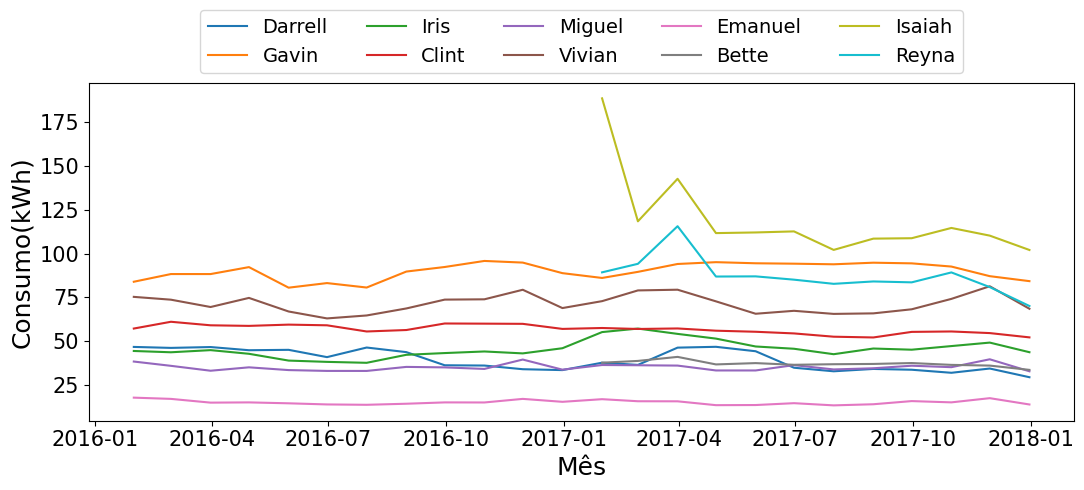

In [5]:
#@title **Comsumo de 2016 à 2017**
font = 18
plt.figure(figsize=(11,5))
for user in users[:10]:
    plt.plot(consumidor[user].resample('ME').mean())

plt.ylabel('Consumo(kWh)',  fontsize = font)
plt.xlabel('Mês',  fontsize = font)
plt.xticks(fontsize=font-3)
plt.yticks(fontsize=font-3)

if len(users) > 0:
    plt.legend(users, loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=5, fontsize=font-4)

plt.tight_layout()

os.makedirs("./figuras/consumo", exist_ok=True)
plt.savefig(f"./figuras/consumo/{max_users}-consumo.eps", format='eps')
plt.show()

In [6]:
#@title **Acesso aos Arquivos Meterologicos**
# https://mapas.inmet.gov.br/

Met = {}
anos = ['2016', '2017']
for ano in anos:
    arquivo = f"./smart-grid/dados/{ano}/INMET_SE_ES_A612_VITORIA_01-01-{ano}_A_31-12-{ano}.csv"
    Met[ano] = pd.read_csv(os.path.abspath(arquivo), delimiter=";")
    
DadosMet = pd.concat([Met[ano] for ano in anos])

colunas_selecionadas = ["Data","Hora (UTC)","Temp. Ins. (C)","Vel. Vento (m/s)","Radiacao (KJ/m²)"]
DadosMet = DadosMet[colunas_selecionadas]
DadosMet.columns=['Data','Hora','temperatura', 'vento', 'radiacao']

# Acerto Hora
try:
    DadosMet['Hora'] /= 100
    DadosMet['Hora'] = DadosMet['Hora'].astype(str).str.replace(".0", ":00")
    DadosMet['Data'] = pd.to_datetime(DadosMet['Data'] + ' ' + DadosMet['Hora'], format='%d/%m/%Y %H:%M')
except:
    DadosMet['Data'] = pd.to_datetime(DadosMet['Data'] + ' ' + DadosMet['Hora'])
# DadosMet = DadosMet.set_axis(list(DadosMet['Data']), axis=0)

# Definir a coluna 'Data' como índice
DadosMet = DadosMet.set_index('Data')

# Converter vírgulas para pontos e transformar em numérico
DadosMet['radiacao'] = pd.to_numeric(DadosMet['radiacao'].str.replace(",", "."), errors='coerce')
DadosMet['temperatura'] = pd.to_numeric(DadosMet['temperatura'].str.replace(",", "."), errors='coerce')
DadosMet['vento'] = pd.to_numeric(DadosMet['vento'].str.replace(",", "."), errors='coerce')

DadosMet['radiacao'] = DadosMet['radiacao'].fillna(0.0)

# Calcular irradiância solar (converter kJ/m² para W/m²)
DadosMet['irradiancia'] = round(DadosMet['radiacao'] * 0.2777777778, 1)

# Remover colunas desnecessárias
DadosMet = DadosMet.drop(columns=['Hora', 'radiacao'])

# Interpolar valores faltantes
DadosMet = DadosMet.interpolate(method='time').bfill()

# Garantir que o índice seja datetime
DadosMet.index = pd.to_datetime(DadosMet.index)

DadosMet

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Arthur\\Documents\\GitHub\\Fontes-Renovaveis\\smart-grid\\dados\\2016\\INMET_SE_ES_A612_VITORIA_01-01-2016_A_31-12-2016.csv'

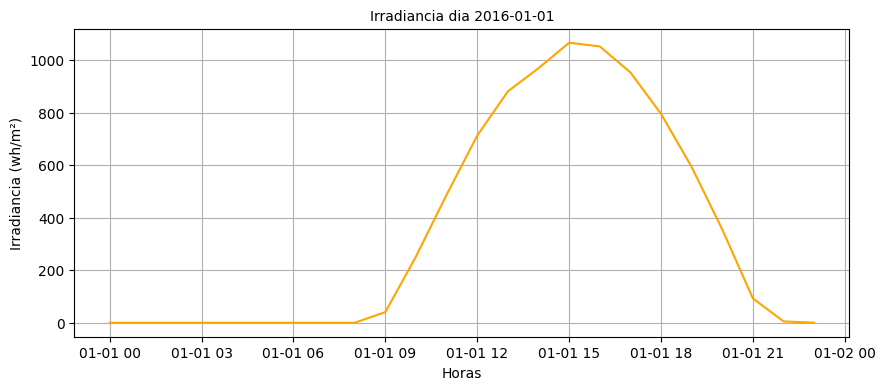

In [ ]:
#@title **Gráfico irradiancia dia 1 do primeiro ano**
plt.figure(figsize=(10,4))

plt.grid(True)
plt.title(f'Irradiancia dia {anos[0]}-01-01',  fontsize = 10)
plt.ylabel('Irradiancia (wh/m²)',  fontsize = 10)
plt.xlabel('Horas',  fontsize = 10)

plt.plot(DadosMet['irradiancia'][:24], color='orange')
plt.show()

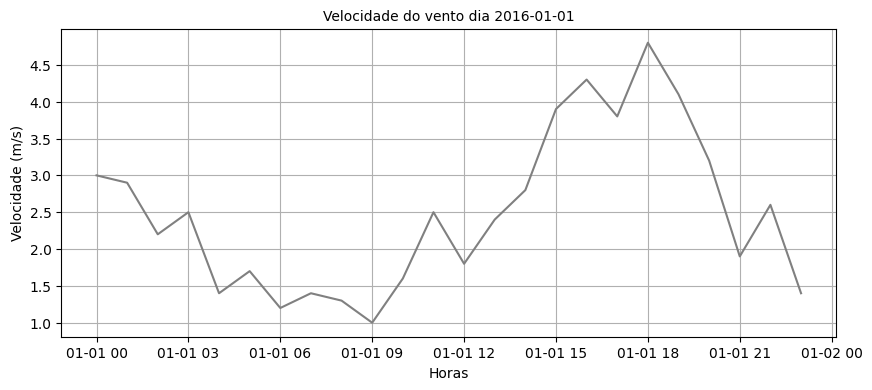

In [ ]:
#@title **Gráfico Vento dia 1 do primeiro ano**
plt.figure(figsize=(10,4))

plt.grid(True)
plt.title(f'Velocidade do vento dia {anos[0]}-01-01',  fontsize = 10)
plt.ylabel('Velocidade (m/s)',  fontsize = 10)
plt.xlabel('Horas',  fontsize = 10)

plt.plot(DadosMet['vento'][:24], color='grey')
plt.show()

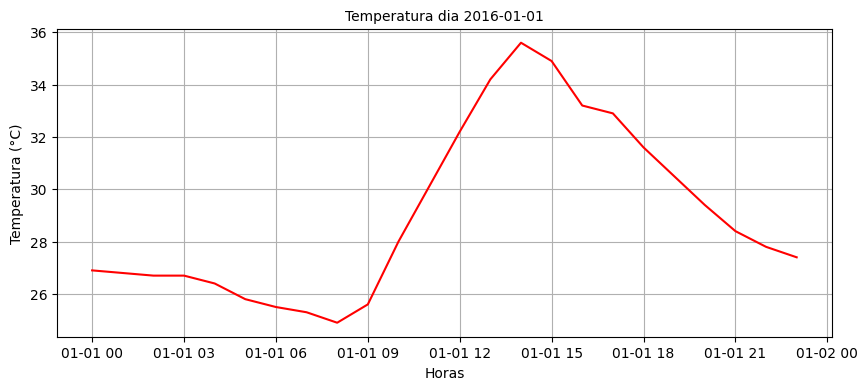

In [ ]:
plt.figure(figsize=(10,4))

plt.grid(True)
plt.title(f'Temperatura dia {anos[0]}-01-01',  fontsize = 10)
plt.ylabel('Temperatura (°C)',  fontsize = 10)
plt.xlabel('Horas',  fontsize = 10)

plt.plot(DadosMet['temperatura'][:24], color='red')
plt.show()

In [ ]:
#@title **Informações da placa**
# https://www.neosolar.com.br/loja/painel-solar-fotovoltaico-280w-osda-oda280-30-p.html

#POTENCIA GERADA PELOS PV's DO MODELO ODA280-30-P 280W
Vmppt = 31.94   # é a tensão no ponto de máxima potência (V);
Imppt = 8.77    # é a corrente no ponto de máxima potência (A).
Voc = 38.33     # é a tensão de circuito aberto do módulo (V);
Isc = 9.41      # é a corrente de curto circuito da célula (A);
nc = 0.1899     # é a eficiência da placa
Not = 45        # é a temperatura nominal de operação da célula (oC);
Kv = -0.3       # é o coeficiente de tensão/temperatura (V/ oC);
Ki = 0.06       # é o coeficiente de corrente/temperatura (A/ oC);

# Constantes
RNOCT = 1000
ta = 0.9

tam = len(DadosMet)     # é a quantidade de horas
power_placa = Voc*Isc   # é a potencia da Placa
horas_exposto = 6       # é a quantidade de horas de exposição da placa

In [ ]:
NPaineis = {}
ir_med = 4.5
for user in users:
    consumo_medio = (consumidor[user]*1000).mean().iloc[0] # media Wh
    NPaineis[user] =  math.ceil((consumo_medio/(power_placa*ir_med*0.75*horas_exposto)))
print(f"Placas - {NPaineis}")

Placas - {'Darrell': 6, 'Gavin': 13, 'Iris': 7, 'Clint': 8, 'Miguel': 5, 'Vivian': 10, 'Emanuel': 3, 'Bette': 6, 'Isaiah': 17, 'Reyna': 12, 'Dannie': 2, 'Angel': 66, 'Shana': 7, 'Maxine': 14, 'Pricilla': 9, 'Emmanuel': 4, 'Barney': 4, 'Esperanza': 4, 'Ida': 4, 'Jill': 88, 'Blanca': 100, 'Joaquin': 10, 'Shelley': 23, 'Dustin': 7, 'Leopoldo': 1, 'Val': 52, 'Marisol': 23, 'Erich': 3, 'Marty': 1, 'Mauricio': 31, 'Sherill': 39, 'Hubert': 1, 'Easter': 4, 'Nina': 35, 'Billi': 6, 'Robin': 6, 'Sonny': 35, 'Barbara': 1, 'Kerri': 3, 'Vera': 16, 'Gussie': 42, 'Veronica': 20, 'Tiffany': 3, 'Willy': 12, 'Kristie': 15, 'Sydney': 18, 'Noma': 4, 'Anisa': 33, 'Gabrielle': 1, 'Chauncey': 76}


In [ ]:
#@title **Painel solar**
PotPVM = {}
for user in users:
    PotPVM[user] = []
    for i in range(tam):
        r   = DadosMet['irradiancia'].iloc[i]
        Ta  = DadosMet['temperatura'].iloc[i]
        Vw  = DadosMet['vento'].iloc[i]
        Tc  = Ta + ((r/RNOCT) * (9.5/(5.7+3.8*Vw)) * (Not-20) * (1 - (nc/ta)))   # Ta + r*(Not-20)/0.8
        I   = r * (Isc + Ki *(Tc-25))
        V   = Voc - Kv *(Tc-25)
        FF  = (Vmppt * Imppt)/(Voc * Isc)
        PotPVM[user].append(NPaineis[user] * FF * V * I)

    PotPVM[user] = pd.DataFrame(PotPVM[user], index=DadosMet.index, columns=["Power (kW)"])/10000

PotPVM[users[0]].iloc[:24,:]

,Power (kW)
Data,
2016-01-01 00:00:00,0.000000
2016-01-01 01:00:00,0.000000
2016-01-01 02:00:00,0.000000
2016-01-01 03:00:00,0.000000
2016-01-01 04:00:00,0.000000
2016-01-01 05:00:00,0.000000
2016-01-01 06:00:00,0.000000
2016-01-01 07:00:00,0.000000
2016-01-01 08:00:00,0.000000


In [ ]:
PotPVM[user].iloc[:24,:].index.strftime('%HH')

Index(['00H', '01H', '02H', '03H', '04H', '05H', '06H', '07H', '08H', '09H',
       '10H', '11H', '12H', '13H', '14H', '15H', '16H', '17H', '18H', '19H',
       '20H', '21H', '22H', '23H'],
      dtype='object', name='Data')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


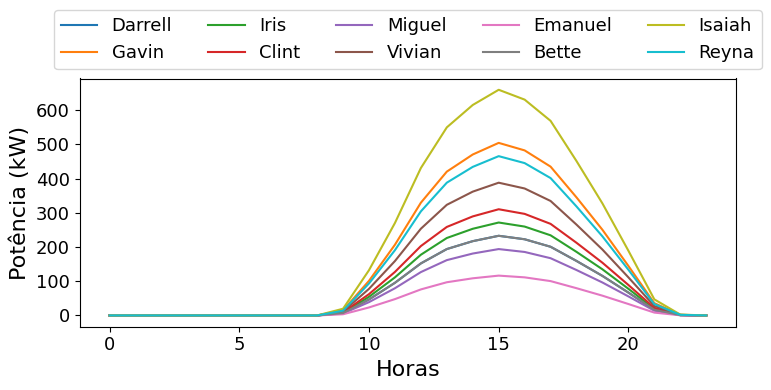

In [ ]:
#@title **Geração no dia 1 do primeiro ano**
plt.figure(figsize=(8,4))

for user in users[:10]:
    plt.plot(PotPVM[user].iloc[:24,:].index.hour, PotPVM[user].iloc[:24,0].values)

label_figure(users, 'Geração Painel solar', 'Potência (kW)', 'Horas', 16, 0)

os.makedirs("./figuras/geracao", exist_ok=True)
plt.savefig(f"./figuras/geracao/{max_users}-geracao.eps", format='eps')
plt.show()

In [ ]:
#@title **EnergBaterry**

from pandas import DataFrame


def energBaterry(l, g, max_battery):
  battery = 0
  bat   = l.copy()*0
  load  = l.copy()
  grid  = g.copy()
  
  
  for i, energ in enumerate(zip(load.iloc[:,0], grid.iloc[:,0])):
    geracao, consumo = energ
    if int(bat.iloc[i:i+1,:].index[0].strftime('%H')) == 1:
      battery = 0
    elif(i):
      battery    = bat.iloc[i-1,0]

    res   = geracao - consumo

    if(res < 0):
      consumo = (-1) * res
      res = 0
      consumo = consumo - battery
      if(consumo < 0):
        battery = (-1) * consumo
        consumo = 0
      else:
        battery = 0
    elif (battery < max_battery):
      consumo = 0
      if (res <= (max_battery-battery)):
        battery = battery + res
        res     = 0
      else:
        res     = res - (max_battery - battery)
        battery = max_battery
    else:
      consumo = 0

    grid.iloc[i,0]  = consumo
    load.iloc[i,0]  = res
    bat.iloc[i,0]   = battery
    
  df = round(pd.concat([grid, load, bat], axis=1), 1) # type: ignore
  df.columns = ['grid', 'load', 'battery']
  return df

In [ ]:
print(f"geração len - {len(PotPVM[users[0]])}, consumo len - {len(consumidor[users[0]])}")

geração len - 17544, consumo len - 17544


In [ ]:
# Bateria Megapack Tesla 1.9MW
max_battery = 1900 # kW
qtd_battery = 0

consumidor_baterry = {}
for chave, consumo in consumidor.items():
    consumidor_baterry[chave] = energBaterry(PotPVM[chave], consumo, max_battery * qtd_battery)
consumidor_baterry[users[0]].iloc[:24,:]

,grid,load,battery
2016-01-01 00:00:00,21.1,0.0,0.0
2016-01-01 01:00:00,20.5,0.0,0.0
2016-01-01 02:00:00,20.4,0.0,0.0
2016-01-01 03:00:00,20.3,0.0,0.0
2016-01-01 04:00:00,20.0,0.0,0.0
2016-01-01 05:00:00,21.1,0.0,0.0
2016-01-01 06:00:00,21.6,0.0,0.0
2016-01-01 07:00:00,21.4,0.0,0.0
2016-01-01 08:00:00,21.9,0.0,0.0
2016-01-01 09:00:00,14.6,0.0,0.0


In [ ]:
## Se valores ficarem None, datas diferentes entre geração e consumo
sum([consumidor_baterry[user].isna().sum().sum() for user in users])

np.int64(33883)

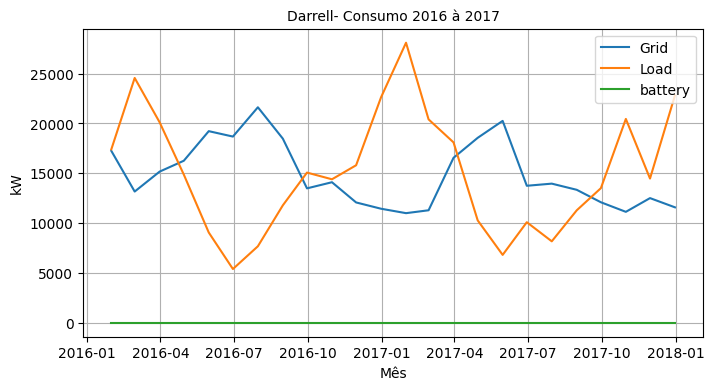

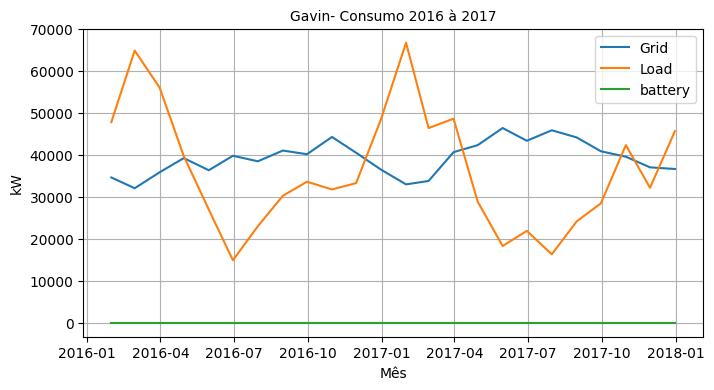

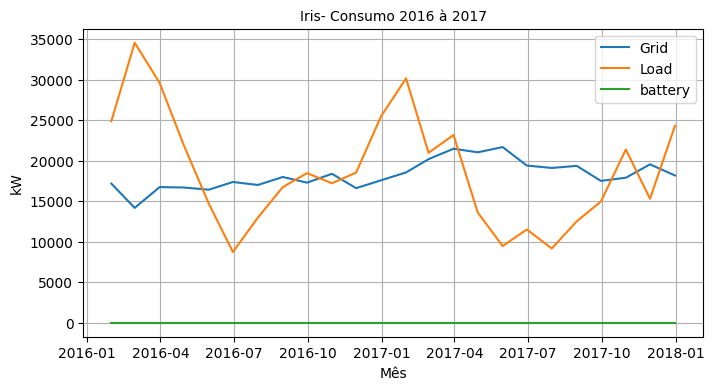

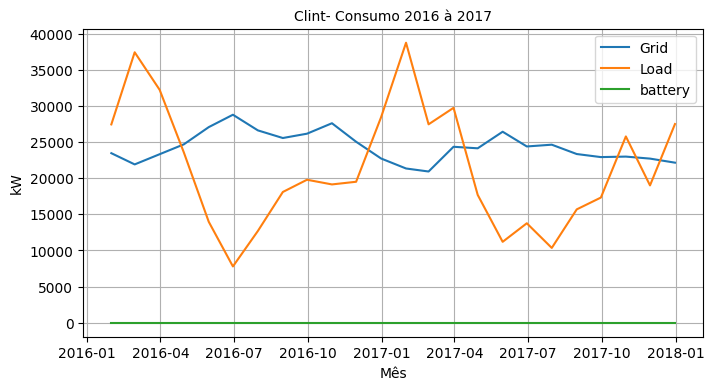

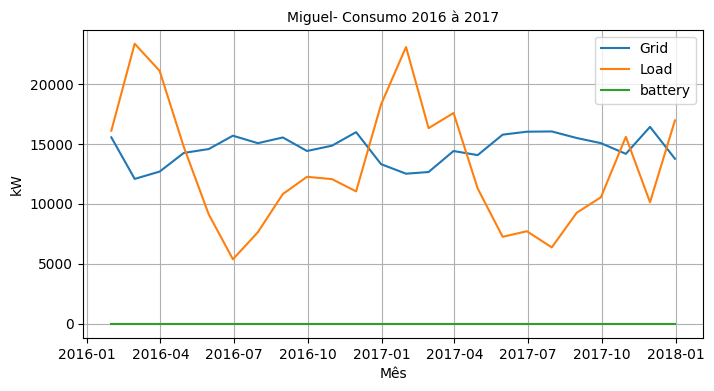

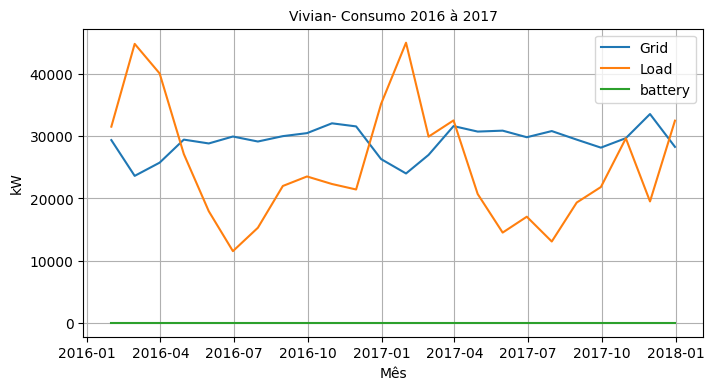

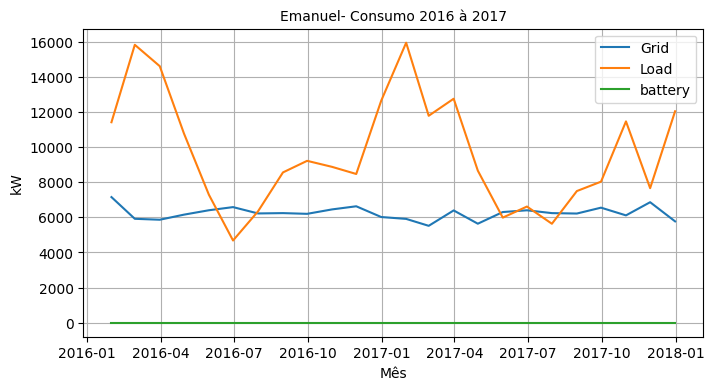

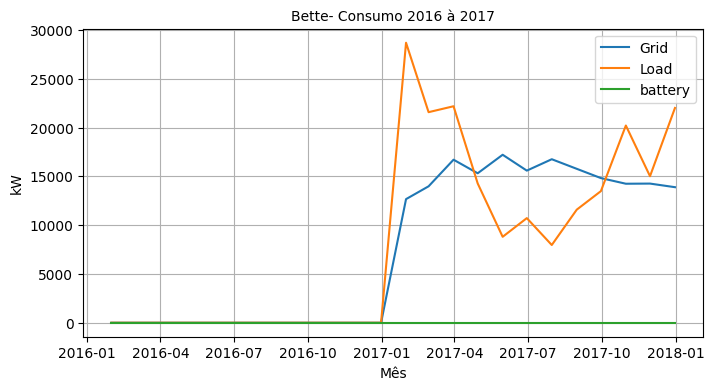

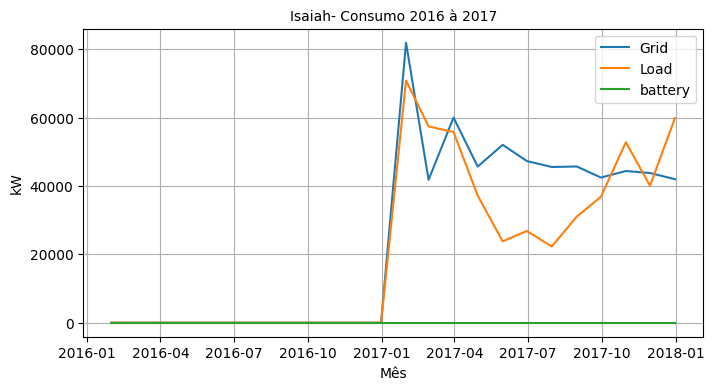

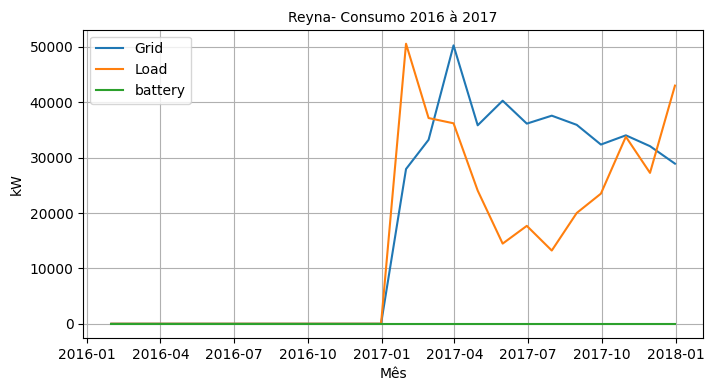

In [ ]:
for user in users[:10]: 
    plt.figure(figsize=(8,4))
    plt.grid(True)
    plt.title(user+f'- Consumo {anos[0]} à {anos[1]}',  fontsize = 10)
    plt.ylabel('kW',  fontsize = 10)
    plt.xlabel('Mês',  fontsize = 10)

    plt.plot(consumidor_baterry[user].resample('ME').sum().resample('ME').mean())
    plt.legend(['Grid', 'Load', 'battery'])
    plt.show()

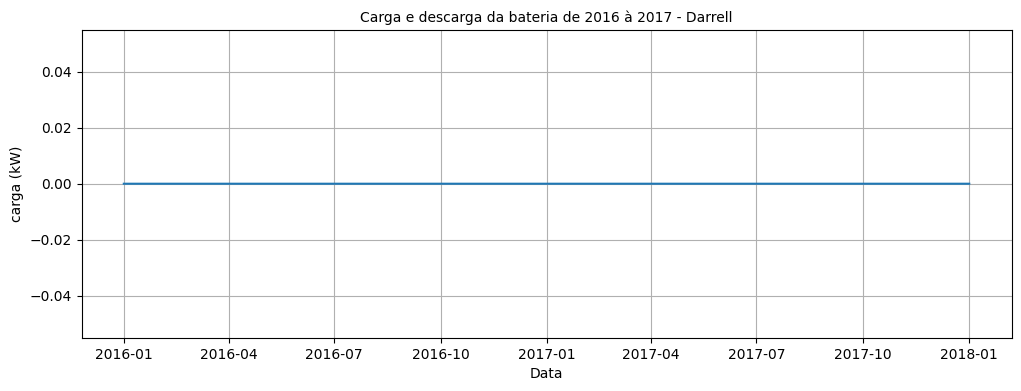

In [ ]:
#@title **Carga e descarga da bateria nos primeiros 4 mês de Janeiro de 2017 - Danna**
plt.figure(figsize=(12,4))

plt.grid(True)
plt.title(f'Carga e descarga da bateria de {anos[0]} à {anos[1]} - '+users[0],  fontsize = 10)
plt.ylabel('carga (kW)',  fontsize = 10)
plt.xlabel('Data',  fontsize = 10)

plt.plot(consumidor_baterry[users[0]]['battery'])#.iloc[:24*30*4,2:3])

plt.show()

In [ ]:
consumo_ano = {}
for user in users:
    consumo_ano[user] = consumidor_baterry[user].resample('ME').sum()
    # consumo_ano[user] = consumidor_baterry[user].copy()
consumo_ano[users[0]]

,grid,load,battery
2016-01-31,17240.9,17400.3,0.0
2016-02-29,13161.8,24558.8,0.0
2016-03-31,15164.4,20107.5,0.0
2016-04-30,16251.9,14866.3,0.0
2016-05-31,19221.9,9051.6,0.0
2016-06-30,18678.4,5389.5,0.0
2016-07-31,21618.6,7671.6,0.0
2016-08-31,18470.1,11780.6,0.0
2016-09-30,13481.7,15065.5,0.0
2016-10-31,14097.7,14392.9,0.0


In [ ]:
# Criar um dicionário vazio para armazenar os DataFrames de crédito
credit = {user: pd.DataFrame(0.0, index=df.index, columns=['grid', 'load']) for user, df in consumo_ano.items()}

# for user, df in consumo_ano.items():
#     for index, row in df.iterrows():
#         if row['load'] > row['grid']:
#             credit[user].at[index, 'load'] = row['load'] - row['grid']
#             credit[user].at[index, 'grid'] = 0
#         else:
#             credit[user].at[index, 'grid'] = row['grid'] - row['load']
#             credit[user].at[index, 'load'] = 0

# Exibir o DataFrame de crédito para o primeiro usuário

# Remover   
for user in users:
    credit[user] = consumo_ano[user]#.iloc[:-3,:]
display(credit[users[0]])


,grid,load,battery
2016-01-31,17240.9,17400.3,0.0
2016-02-29,13161.8,24558.8,0.0
2016-03-31,15164.4,20107.5,0.0
2016-04-30,16251.9,14866.3,0.0
2016-05-31,19221.9,9051.6,0.0
2016-06-30,18678.4,5389.5,0.0
2016-07-31,21618.6,7671.6,0.0
2016-08-31,18470.1,11780.6,0.0
2016-09-30,13481.7,15065.5,0.0
2016-10-31,14097.7,14392.9,0.0


In [ ]:
#@title **Custo anual de eletricidade**
c_fit = 0
c_tou = tou.iloc[:,0]
Ce = lambda x: sum(((energBaterry(PotPVM, consumo, x)[1]).iloc[:,0])*c_tou)
round(Ce(572241),2)

In [ ]:
#@title **Custo anual relacionado à bateria**
SOH         = 0.8
rep         = 0.6
c_ic        = 0.684372
e_b         = 2000 # 3.9 * 10**6 # capacidade da bateria # Otimizar

c_bat       = lambda x: (((1-SOH)/(1-rep))*c_ic*x)

round(c_bat(3900000),2)

In [ ]:
#@title **Custo anual total do sistema solar com bateria**
Cop = lambda x: c_bat(x) + Ce(x)
round(Cop(2000),2)

In [ ]:
#@title **C_sav**
C_pv = (consumo.iloc[:,0] - PotPVM.iloc[:,0]) * c_tou
C_pv [C_pv < 0] = 0
C_pv = C_pv.sum()

C_sav = lambda x: C_pv - Cop(x)
round(C_sav(2000), 2)

In [ ]:
#@title **Retorno de investimento**

roi = lambda x: (C_sav(x)/c_bat(x))*100
round(roi(348528.36539327),2)

In [ ]:
# Função para realizar a otimização com base em uma seed específica
def run_optimization(problem, algorithm, seed, verbose=False):
    # Executar a otimização com a seed específica
    result = minimize(problem, algorithm, seed=seed, termination=('n_gen', 1), verbose=verbose)

    # Armazenar o resultado e a seed diretamente na lista
    results_list.append((result, seed))

# Definir o problema de otimização
n_var = 1
max_baterry = 3.9*10**6
objs = [c_bat, lambda x: [sum(energBaterry(PotPVM, consumo,x)[1].iloc[:,0] * c_tou)]]
problem = FunctionalProblem(n_var, objs, xl=np.full(n_var, 0), xu=np.full(n_var, max_baterry))

# Configurar o algoritmo NSGA-III
num_ref_dirs = 100
ref_dirs_custom = np.linspace(0, max_baterry, num_ref_dirs)
ref_dirs_custom = np.column_stack((ref_dirs_custom, np.flip(ref_dirs_custom)))
algorithm = NSGA3(pop_size=100, ref_dirs=ref_dirs_custom)
    
# Lista de seeds que serão utilizadas para a otimização
num_seeds = 5
seeds = np.random.randint(1, 1000, size=num_seeds).tolist()

# Criar uma lista para armazenar os resultados e as seeds
results_list = []

# # Criar threads para executar a otimização para cada seed
# threads = [threading.Thread(target=run_optimization, args=(problem, algorithm, seed,)) for seed in seeds[:len(seeds)-1]]
# threads.append(threading.Thread(target=run_optimization, args=(problem, algorithm, seeds[len(seeds)-1], True,)))

result = minimize(problem, algorithm, seed=980, termination=('n_gen', 10), verbose=True)

# # Iniciar as threads
# for thread in threads:
#     thread.start()

# # Aguardar todas as threads serem concluídas
# for thread in threads:
#     thread.join()
    
# result_max = results_list[0]
# for result in results_list:
#     len_population = len(result[0].X)
#     if (len(result_max[0].X)<=len_population):
#         result = result

# # Acessar os resultados
# result = result_max[0]

final_population = result.X
final_objectives = result.F

# Imprimir os resultados
lista = []
for individual, objectives in zip(final_population, final_objectives):
    dist = np.linalg.norm([0, 0] - objectives)
    print("Individual: ", individual)
    print("Objectives: ", objectives)
    print("Distancia:  ", [dist])
    print("------------------------")

    lista.append((individual, objectives, dist))

print(min(lista, key=lambda x: x[2]))

scatter_plot = Scatter().add(result.F).show()

scatter_plot.save("scatter_plot.png")

In [ ]:
for result in results_list:
    print(len(result[0].X), result) 

In [ ]:
# 49 [298]
# 52 (<pymoo.core.result.Result object at 0x000001D55FC04AD0>, 980)
print(len(result.X))

In [ ]:
# Criação do gráfico
plt.figure(figsize=(8, 6))

# Transposta do array final_objectives para facilitar o plotting
final_objectives_transpose = final_objectives.T

# Plotar cada objetivo em uma reta usando broadcasting do NumPy
plt.plot(final_objectives_transpose[0], label="C_bat")
plt.plot(final_objectives_transpose[1], label="Ce")

# Encontrar o ponto mínimo na lista de tuplas (individual, objectives, dist)
min_dist_point = min(lista, key=lambda x: x[2])

# Extrair o índice do ponto mínimo na lista
min_dist_index = lista.index(min_dist_point)

# Marcando o ponto mínimo no gráfico
plt.scatter(min_dist_index, min_dist_point[1][0], color='red', label='Ponto Mínimo')

plt.xlabel("nds")
plt.ylabel("Valor dos Objetivos")
plt.legend()
plt.grid(True)
plt.title("Comparativo do custo em cada geração")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Rótulos dos objetivos
labels = ['C_bat', 'Ce']

# Criar o boxplot
plt.boxplot(final_objectives, labels=labels)

# Configurar o gráfico
plt.title('Boxplot dos Objetivos')
plt.xlabel('Objetivos')
plt.ylabel('Valores')
plt.grid(True)

# Exibir o gráfico
plt.show()

In [ ]:
# Função para verificar se um ponto é dominado por outro ponto
def is_dominated(point, other_points):
    return np.any(np.all(point >= other_points, axis=1))

# Encontrar o conjunto de Pareto
pareto_front = []
for i, point in enumerate(final_objectives):
    if not is_dominated(point, np.delete(final_objectives, i, axis=0)):
        pareto_front.append(point)

pareto_front = np.array(pareto_front)

# Encontrar o ponto mínimo na lista de tuplas (individual, objectives, dist)
min_dist_point = min(lista, key=lambda x: x[2])

# Extrair o índice do ponto mínimo na lista
min_dist_index = lista.index(min_dist_point)

# Plotar o gráfico de dispersão
plt.scatter(final_objectives[:, 0], final_objectives[:, 1], label="Outros Pontos")
plt.scatter(final_objectives[min_dist_index, 0], final_objectives[min_dist_index, 1], color='red', label="Ponto Mínimo")

# Definir os rótulos dos eixos
plt.xlabel("C_bat")
plt.ylabel("Ce")

# Definir o título do gráfico
plt.title("Conjunto de Pareto")

# Exibir a legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [ ]:
b = min(lista, key=lambda x: x[2])[0][0]
b

In [ ]:
roi(min(lista, key=lambda x: x[2])[0][0])

In [ ]:
C_pv

In [ ]:
Cop(b)